## Import Library and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
import sklearn.linear_model as linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

le = preprocessing.LabelEncoder()

In [2]:
df_bank_train = pd.read_csv('dataset/bank-additional-full.csv', delimiter=';')

In [3]:
df_bank_test = pd.read_csv('dataset/bank-additional.csv', delimiter=';')

In [4]:
df_bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_bank_train.shape

(41188, 21)

In [6]:
df_bank_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
df_bank_test.shape

(4119, 21)

In [8]:
df_bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df_bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Cleaning Data

In [10]:
df_bank_train.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [11]:
df_bank_train.duplicated().any()

True

In [12]:
df_bank_train.drop_duplicates(inplace=True)

In [13]:
df_bank_train.duplicated().any()

False

In [14]:
df_bank_test.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [15]:
df_bank_test.duplicated().any()

False

In [16]:
labels = df_bank_train['y'].value_counts()
labels

no     36537
yes     4639
Name: y, dtype: int64

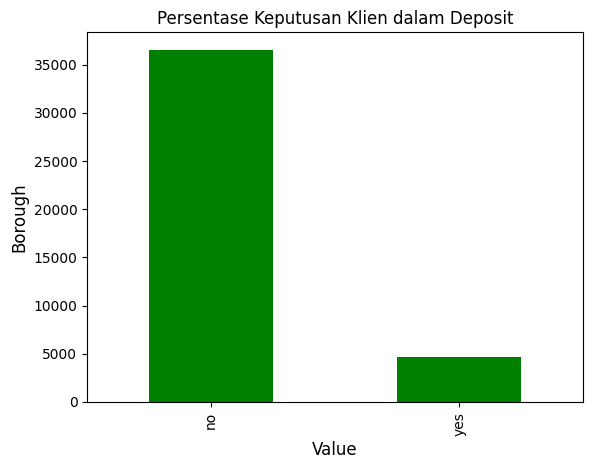

In [17]:
df_bank_train['y'].value_counts().plot(kind='bar',
                                       color='green')


plt.title('Persentase Keputusan Klien dalam Deposit', fontsize = 12)
plt.xlabel('Value', fontsize = 12 )
plt.ylabel('Borough', fontsize = 12)
plt.show()

In [18]:
columns_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in columns_cat:
    df_bank_train[col] = le.fit_transform(df_bank_train[col])
    df_bank_test[col] = le.fit_transform(df_bank_test[col])

In [19]:
df_bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
df_bank_train.loc[df_bank_train['y'] == 'no', 'y'] = 0
df_bank_train.loc[df_bank_train['y']=='yes', 'y'] = 1
df_bank_test.loc[df_bank_test['y'] == 'no', 'y'] = 0
df_bank_test.loc[df_bank_test['y']=='yes', 'y'] = 1

In [21]:
df_train = df_bank_train[df_bank_train[col].isin([0,1])]
df_test = df_bank_test[df_bank_test[col].isin([0,1])]

## Data Train & Data Test

In [22]:
columns_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [23]:
x_train = df_bank_train[columns_features].to_numpy()
y_train = df_bank_train['y'].astype('int').to_numpy()

In [24]:
x_test = df_bank_test[columns_features].to_numpy()
y_test = df_bank_test['y'].astype('int').to_numpy()

### Logistic Regression

In [25]:
model_linear_regression = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)

model_linear_regression.fit(x_train, y_train)

c:\Users\vin16\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [26]:
y_pred_lr = model_linear_regression.predict(x_test)

In [27]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy 0.9038601602330663


### K-Nearest Neighbor (KNN)

In [28]:
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

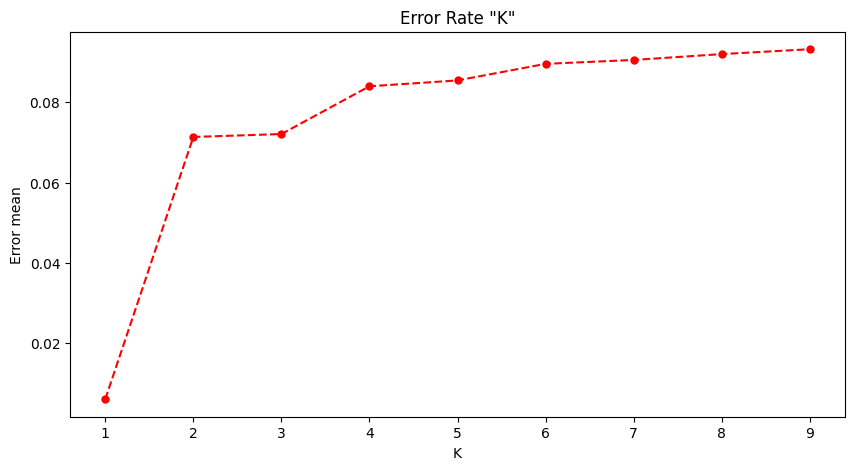

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate "K"')
plt.xlabel('K')
plt.ylabel('Error mean')

In [30]:
model_knn = KNeighborsClassifier(n_neighbors=6)

model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [31]:
y_predict_knn = model_knn.predict(x_test)

In [32]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict_knn))

Accuracy:  0.9104151493080845


### Support Vector Machine (SVM)

In [33]:
model_svm_linear = svm.SVC(kernel='linear')

model_svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred_svm = model_svm_linear.predict(x_test)


In [35]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_svm))

Accuracy:  0.9002184996358339


### Naive Bayes

In [36]:
model_naivebayes = GaussianNB()

model_naivebayes.fit(x_train, y_train)

GaussianNB()

In [37]:
y_pred_nb = model_naivebayes.predict(x_test)

In [38]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_nb))

Accuracy:  0.8327263899004613


### Decision Tree Classifier

In [39]:
model_decision_tree = DecisionTreeClassifier(max_depth=1, criterion='gini')

model_decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [40]:
y_pred_decision_tree = model_decision_tree.predict(x_test)

In [41]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_decision_tree))

Accuracy:  0.890507404709881


### Random Forest

In [43]:
model_randomforest = RandomForestClassifier(n_estimators=100)

model_randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
y_predict_rf = model_randomforest.predict(x_test)

In [45]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict_rf))

Accuracy:  0.9936877882981306


# Kesimpulan

Hasil score dari train dan test menunjukan bahwa score akurasi tertinggi mencapai dempurna dicapai oleh Random Forest Method yang menyentuh 0.9929594561786842